In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyautogui
import numpy as np
from PIL import Image
from time import sleep
from glob import glob
import cv2
import uuid
import os

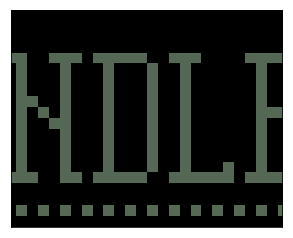

In [105]:
im = pyautogui.screenshot(region=(600, 580, 50, 40))
plt.subplot(1,1,1), plt.title(''), plt.xticks([]), plt.yticks([]), plt.imshow(im);

In [15]:
type(im)

PIL.Image.Image

In [106]:
import os
if not os.path.exists('anchors'): os.mkdir('anchors')
if not os.path.exists('anchors/received-docs'): os.mkdir('anchors/received-docs')
im.save('anchors/endless.png')

In [2]:
def find_origin_coordinates():
    im = pyautogui.screenshot()
    im2 = Image.open('anchors/endless.png')
    result = cv2.matchTemplate(np.array(im2), np.array(im), cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    if max_val < 0.999:
        raise Exception('no endless found')
    return max_loc

In [4]:
find_origin_coordinates()

(1357, 596)

In [ ]:
offset = max_loc[0] - 600, max_loc[1] - 580

In [3]:
def click(x, y):
    global offset
    pyautogui.moveTo(offset[0]+x, offset[1]+y)
    pyautogui.click()

def start_game():
    click(625, 600)
    sleep(2)
    click(343, 201)
    click(543, 461)
    click(637, 631)
    sleep(9)

In [ ]:
if max_val > 0.999:
    start_game()

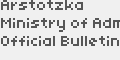

In [5]:
sleep(2)
#pyautogui.position()
im = pyautogui.screenshot(region=(offset[0]+670, offset[1]+276, 120, 60));im

In [54]:
im.save('anchors/bulletin.png')

In [4]:
# screenshot for wanted criminals
def resume():
    click(803, 484)
    pyautogui.press('esc')
    sleep(0.5)

def look_for_wanted_criminals():
    im = pyautogui.screenshot(region=(offset[0]+670, offset[1]+276, 120, 60))
    im2 = Image.open('anchors/bulletin.png')
    if not (np.array(im) == np.array(im2)).all():
        raise Exception()
    pyautogui.move(1,1)
    pyautogui.press('right')
    wanted_criminals = pyautogui.screenshot(region=(offset[0]+64, offset[1]+50, 1140, 640))
    pyautogui.press('left')
    return wanted_criminals

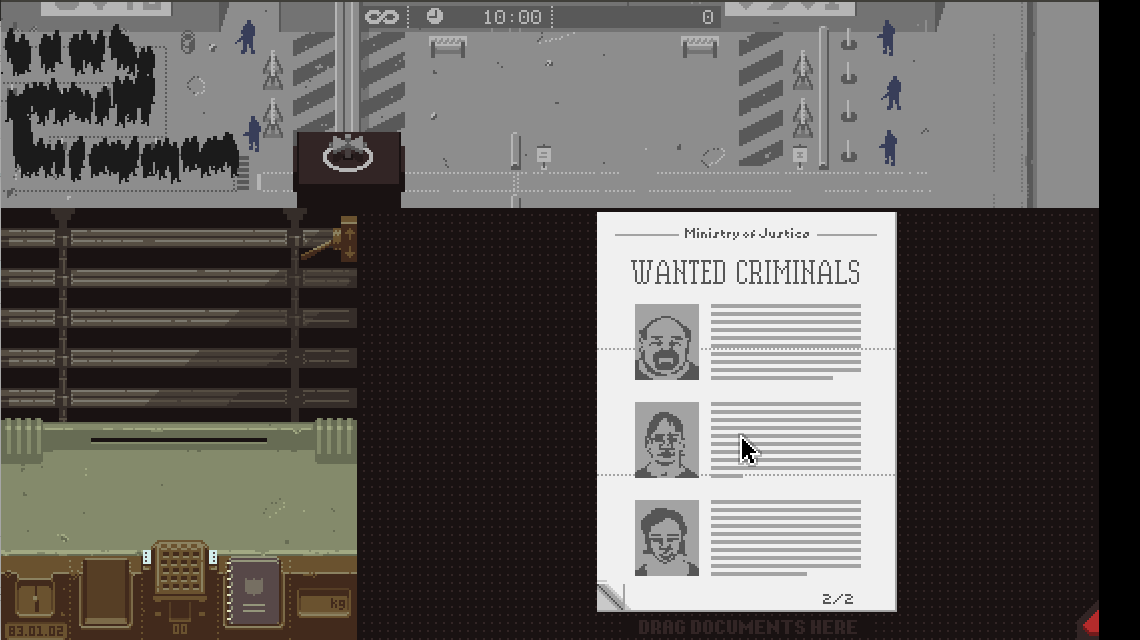

In [40]:
resume()
look_for_wanted_criminals()

In [41]:
# put instructions away
resume()
pyautogui.dragTo(offset[0]+177, offset[1]+638, button='left', duration=0.4)

In [5]:
def call_next():
    click(415, 200)
    sleep(7)

In [44]:
resume()
call_next()

In [6]:
def received_docs():
    return pyautogui.screenshot(region=(offset[0]+67, offset[1]+479, 417-67, 599-479))

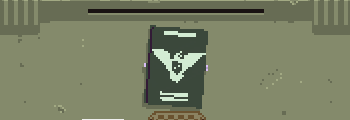

In [46]:
resume()
received_docs()

In [138]:
docs.save('anchors/received-docs/antegria-permit.png')

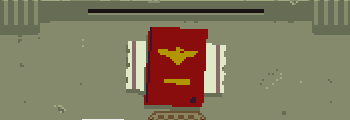

In [140]:
resume()
docs = received_docs()
docs

In [141]:
docs.save('anchors/received-docs/obristan-permit.png')

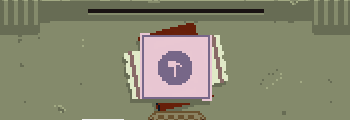

In [142]:
resume()
docs = received_docs()
docs

In [143]:
docs.save('anchors/received-docs/impor-workpass.png')

In [161]:
def received_docs_options():
    return {f.split('/')[-1].split('.')[0]: Image.open(f) for f in glob('anchors/received-docs/*.png')} 
received_docs_options()

{'antegria-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFEB8>,
 'impor-workpass': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDF8D0>,
 'obristan-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDF9B0>,
 'obristan-workpass': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFFD0>,
 'republia-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFE80>}

In [165]:
def received_docs_type(docs=None):
    docs = docs or received_docs()
    for t, val in received_docs_options().items():
        if (np.array(val) == np.array(docs)).all():
            return t
    return None

In [156]:
resume()
received_docs_type()

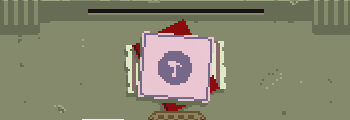

In [155]:
resume()
docs = received_docs()
docs

In [157]:
docs.save('anchors/received-docs/obristan-workpass.png')

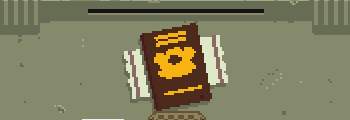

In [158]:
resume()
docs = received_docs()
docs

In [159]:
docs.save('anchors/received-docs/republia-permit.png')

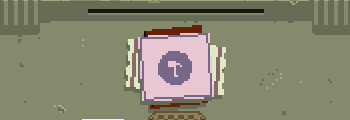

In [167]:
resume()
docs = received_docs()
docs

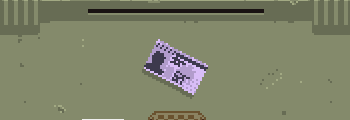

In [169]:
resume()
docs = received_docs()
docs

In [170]:
docs.save('anchors/received-docs/arstotzka-id.png')

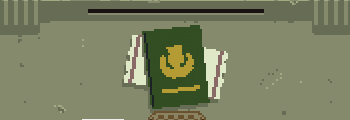

In [172]:
resume()
docs = received_docs()
docs

In [173]:
resume()
received_docs_type()

Oh no! Documents are not always handed in the same rotation!

In [7]:
def moveTo(x, y):
    global offset
    pyautogui.moveTo(offset[0]+x, offset[1]+y)

def dragTo(x, y, button='left', duration=0.4):
    global offset
    pyautogui.dragTo(offset[0]+x, offset[1]+y, button=button, duration=duration)

def open_doc(counter):
    moveTo(243 + ((-1) ** (counter % 2)) * (counter // 2) * 20, 547)
    dragTo(815, 468)

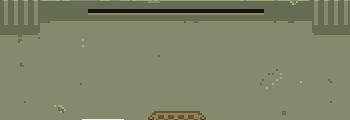

In [48]:
resume()
empty = received_docs()
empty

In [54]:
empty.save('anchors/nodocs.png')

In [8]:
def screenshot(x1, y1, x2, y2):
    global offset
    return pyautogui.screenshot(region=(offset[0]+x1, offset[1]+y1, x2 - x1, y2 - y1))

def receive_all_documents():
    im = received_docs()
    im2 = Image.open('anchors/nodocs.png')
    counter = 0
    documents_screenshots = []
    while not (np.array(im) == np.array(im2)).all():
        open_doc(counter)
        documents_screenshots.append(screenshot(430, 265, 1204, 682))
        new_im = received_docs()
        if (np.array(im) == np.array(new_im)).all():
            counter += 1
        else:
            counter = 0
            im = new_im
    return documents_screenshots

In [13]:
resume()
receive_all_documents()

In [104]:
resume()
im = screenshot(680, 437, 810, 454)
im

In [105]:
im.save('anchors/entry_visa.png')

In [50]:
resume()
im = pyautogui.screenshot()
im2 = Image.open('anchors/entry_visa.png')
result = cv2.matchTemplate(np.array(im2), np.array(im), cv2.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv2.minMaxLoc(result)
max_val, max_loc

(0.999999463558197, (252, 851))

In [9]:
def put_document_away():
    moveTo(815, 468)
    dragTo(198, 547) # needs to overshoot because it is dropped early

In [10]:
def find_entry_visa():
    im = pyautogui.screenshot()
    im2 = Image.open('anchors/entry_visa.png')
    result = cv2.matchTemplate(np.array(im2), np.array(im), cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    if max_val > 0.999:
        return max_loc[0] - offset[0], max_loc[1] - offset[1]
    return None

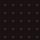

In [18]:
resume()
im = screenshot(815, 468, 855, 508)
im

In [19]:
im.save('anchors/nodoc_right.png')

In [11]:
def return_documents():
    counter = 0
    im = screenshot(815, 468, 855, 508)
    im2 = Image.open('anchors/nodoc_right.png')
    while not (np.array(im) == np.array(im2)).all():
        if counter > 10:
            raise Exception()
        counter += 1
        moveTo(815, 468)
        dragTo(221, 391)
        im = screenshot(815, 468, 855, 508)

    im = received_docs()
    im2 = Image.open('anchors/nodocs.png')
    counter = 1
    while not (np.array(im) == np.array(im2)).all():
        if counter > 10:
            raise Exception()
        moveTo(243 + ((-1) ** (counter % 2)) * (counter // 2) * 20, 547)
        dragTo(221, 391)
        new_im = received_docs()
        if (np.array(im) == np.array(new_im)).all():
            counter += 1
        else:
            counter = 0
            im = new_im

In [12]:
def accept():
    counter = 0
    im2 = Image.open('anchors/nodoc_right.png')
    while True:
        counter += 1
        if counter == 10:
            raise Exception('failed to find entry visa')
        im = screenshot(815, 468, 855, 508)
        if (np.array(im) == np.array(im2)).all():
            return False

        entry_visa = find_entry_visa()
        if entry_visa is None:
            put_document_away()
            continue
        moveTo(*entry_visa)
        dragTo(1038, 395)
        pyautogui.press('tab')
        sleep(0.5)
        click(1038, 395)
        moveTo(1038, 455)
        pyautogui.press('tab')
        dragTo(221, 391)
        return_documents()
        return True

In [13]:
def get_person_face():
    return screenshot(823-757, 280-16, 1170-757, 471-16)

In [22]:
max_loc = find_origin_coordinates()
offset = max_loc[0] - 600, max_loc[1] - 580
start_game()
look_for_wanted_criminals()
call_next()
docs = receive_all_documents()
face = get_person_face()
accept()
sleep(8)
result = screenshot(627, 494, 994, 646)
docs, face, result

([<PIL.Image.Image image mode=RGB size=774x417 at 0x7F2B01E74EB8>,
  <PIL.Image.Image image mode=RGB size=774x417 at 0x7F2B01E74F60>,
  <PIL.Image.Image image mode=RGB size=774x417 at 0x7F2B01E749B0>],
 <PIL.Image.Image image mode=RGB size=347x191 at 0x7F2B01E74EF0>,
 <PIL.Image.Image image mode=RGB size=367x152 at 0x7F2B01E74CF8>)

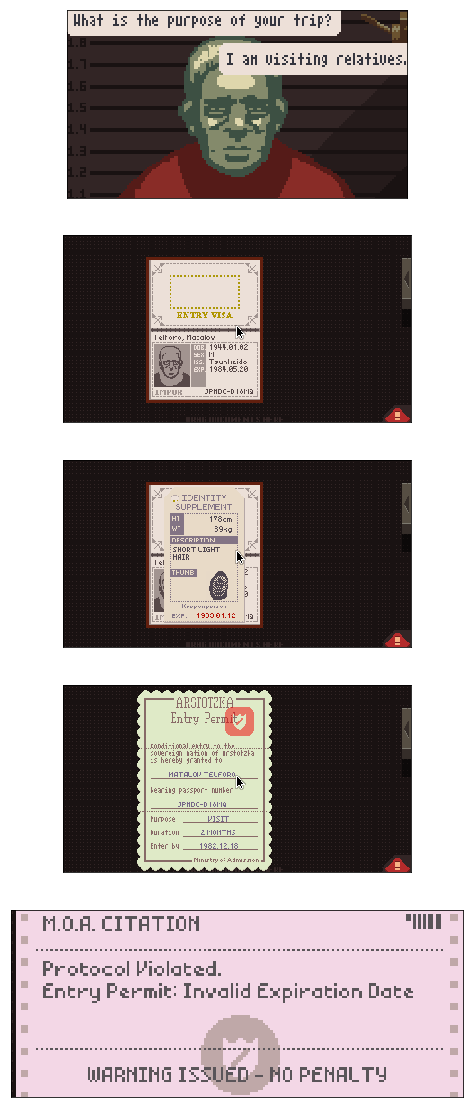

In [24]:
plt.figure(figsize=(10, len(docs)*5+5))
for i, im in enumerate([face] + docs + [result]):
    plt.subplot(len(docs)+2, 1, i+1), plt.yticks([]), plt.xticks([]), plt.imshow(im);

In [14]:
def back_to_main_menu():
    pyautogui.press('esc')
    click(634, 564)
    sleep(2)
    click(637, 517)
    click(141, 629)

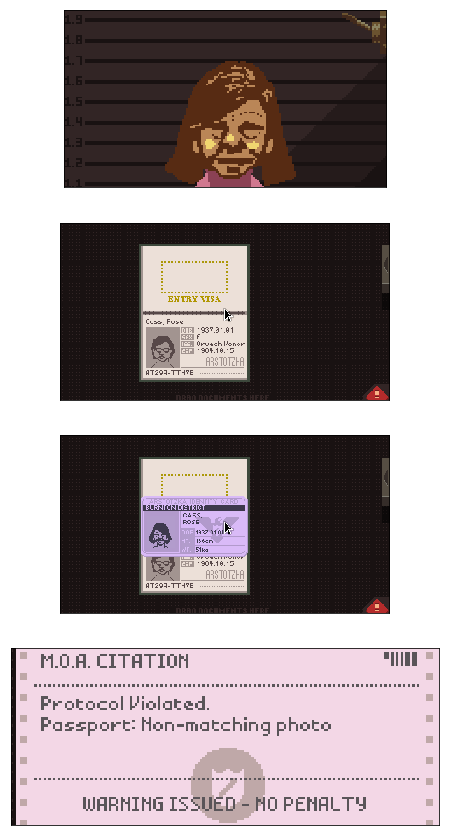

In [16]:
max_loc = find_origin_coordinates()
offset = max_loc[0] - 600, max_loc[1] - 580
start_game()
look_for_wanted_criminals()
call_next()
docs = receive_all_documents()
face = get_person_face()
accept()
sleep(8)
result = screenshot(627, 494, 994, 646)
plt.figure(figsize=(10, len(docs)*5+5))
for i, im in enumerate([face] + docs + [result]):
    plt.subplot(len(docs)+2, 1, i+1), plt.yticks([]), plt.xticks([]), plt.imshow(im);
back_to_main_menu()

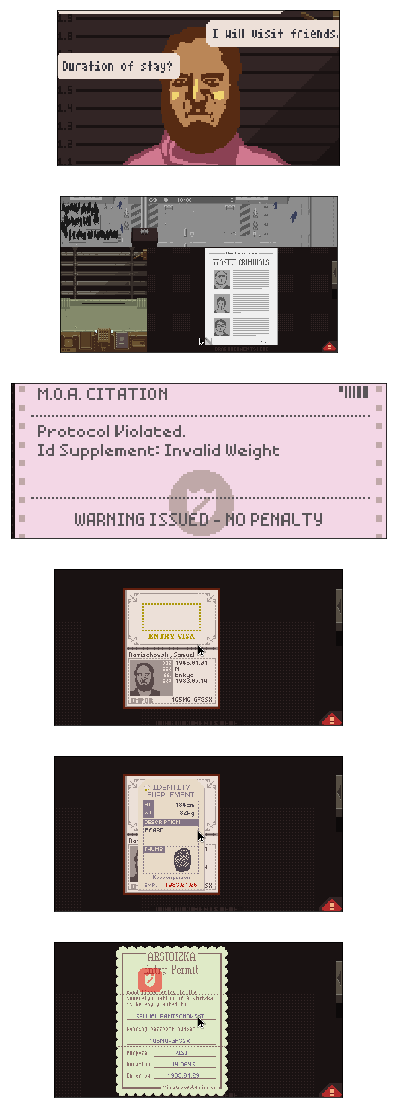

In [23]:
max_loc = find_origin_coordinates()
offset = max_loc[0] - 600, max_loc[1] - 580
start_game()
wanted_criminals = look_for_wanted_criminals()
call_next()
docs = receive_all_documents()
face = get_person_face()
accept()
sleep(8)
result = screenshot(627, 494, 994, 646)
plt.figure(figsize=(10, len(docs)*5+5))
images = [face, wanted_criminals, result] + docs
for i, im in enumerate(images):
    plt.subplot(len(images), 1, i+1), plt.yticks([]), plt.xticks([]), plt.imshow(im);
back_to_main_menu()

In [15]:
def get_transcript():
    moveTo(248, 622)
    dragTo(795, 475)
    im = screenshot(430, 265, 1204, 682)
    dragTo(248, 622)
    return im

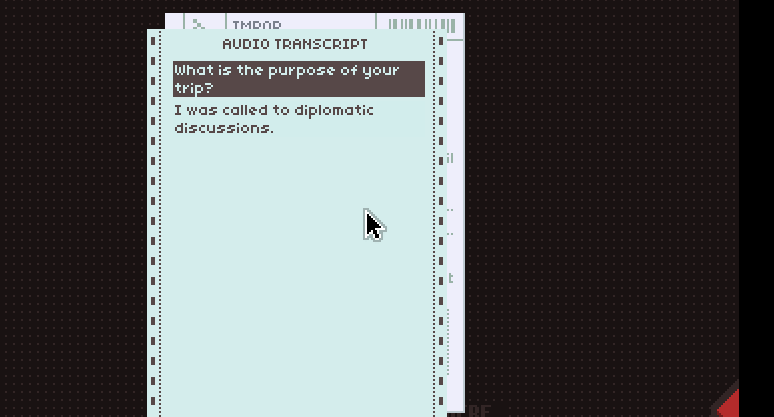

In [30]:
resume()
get_transcript()

In [16]:
def ask_for_passport():
    moveTo(313, 636)
    dragTo(800, 477)
    pyautogui.press('right')
    pyautogui.press('space')
    sleep(0.5)
    click(611, 392)
    click(144, 544)
    sleep(2)
    click(239, 628)
    sleep(5)
    moveTo(800, 477)
    pyautogui.press('left')
    dragTo(313, 636)

In [17]:
def put_citation_away():
    moveTo(640, 639)
    dragTo(1197, 268)

In [18]:
def has_finished():
    im = screenshot(586, 492, 675, 533)
    im2 = Image.open('anchors/okay.png')
    return (np.array(im) == np.array(im2)).all()

In [26]:
while True:
    try:
        max_loc = find_origin_coordinates()
        offset = max_loc[0] - 600, max_loc[1] - 580
        start_game()
        wanted_criminals = look_for_wanted_criminals()
        while not has_finished():
            call_next()
            docs = receive_all_documents()
            face = get_person_face()
            transcript = get_transcript()
            if not accept():
                ask_for_passport()
                docs.extend(receive_all_documents())
                accept()
            sleep(8)
            result = screenshot(627, 494, 994, 646)
            if not os.path.exists('data'): os.mkdir('data')
            images = [face, wanted_criminals, transcript] + docs
            id = str(uuid.uuid4())
            os.mkdir('data/{}'.format(id))
            for i, im in enumerate(images):
                im.save('data/{}/{}.png'.format(id, i))
            result.save('data/{}/result.png'.format(id))
            put_citation_away()
    except Exception as e:
        print(e)
        if 'no endless found' in str(e):
            raise e
    click(632, 500)
    click(140, 627)
    sleep(2)

PyAutoGUI fail-safe triggered from mouse moving to upper-left corner. To disable this fail-safe, set pyautogui.FAILSAFE to False.


FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to upper-left corner. To disable this fail-safe, set pyautogui.FAILSAFE to False.

In [ ]:
pos=pyautogui.position();pos.x-offset[0],pos.y-offset[1]